# CAMB Python simplified example notebook for Cosmology

Initial notebook : [CAMB distribution](https://camb.readthedocs.io/en/latest/index.html) from CAMB demo notebook

Pr Hervé Dole, Université Paris-Saclay, 202301
Updated by H. Dole - 20251022



## python libs setup and declarations

In [1]:
import matplotlib
from matplotlib import pyplot as plt
import numpy as np
from astropy.io import ascii

import camb
from camb import model, initialpower

# for plots
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## CAMB Cosmological Parameters setup

In [2]:
#Set up a new set of parameters for CAMB
pars = camb.CAMBparams()
#This function sets up CosmoMC-like settings, with one massive neutrino and helium set using BBN consistency
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122, mnu=0.06, omk=0, tau=0.06)
pars.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars.set_for_lmax(3500, lens_potential_accuracy=0);

## 1. Compute this universe

In [3]:
#calculate results for these parameters
results = camb.get_results(pars)

In [4]:
#get dictionary of CAMB power spectra
powers =results.get_cmb_power_spectra(pars, CMB_unit='muK')
for name in powers: print(name)

total
unlensed_scalar
unlensed_total
lensed_scalar
tensor
lens_potential


In [5]:
#get the total lensed CMB power spectra
totCL=powers['total']
print(totCL.shape)

(3551, 4)


In [6]:
# get the l's
ls = np.arange(totCL.shape[0])

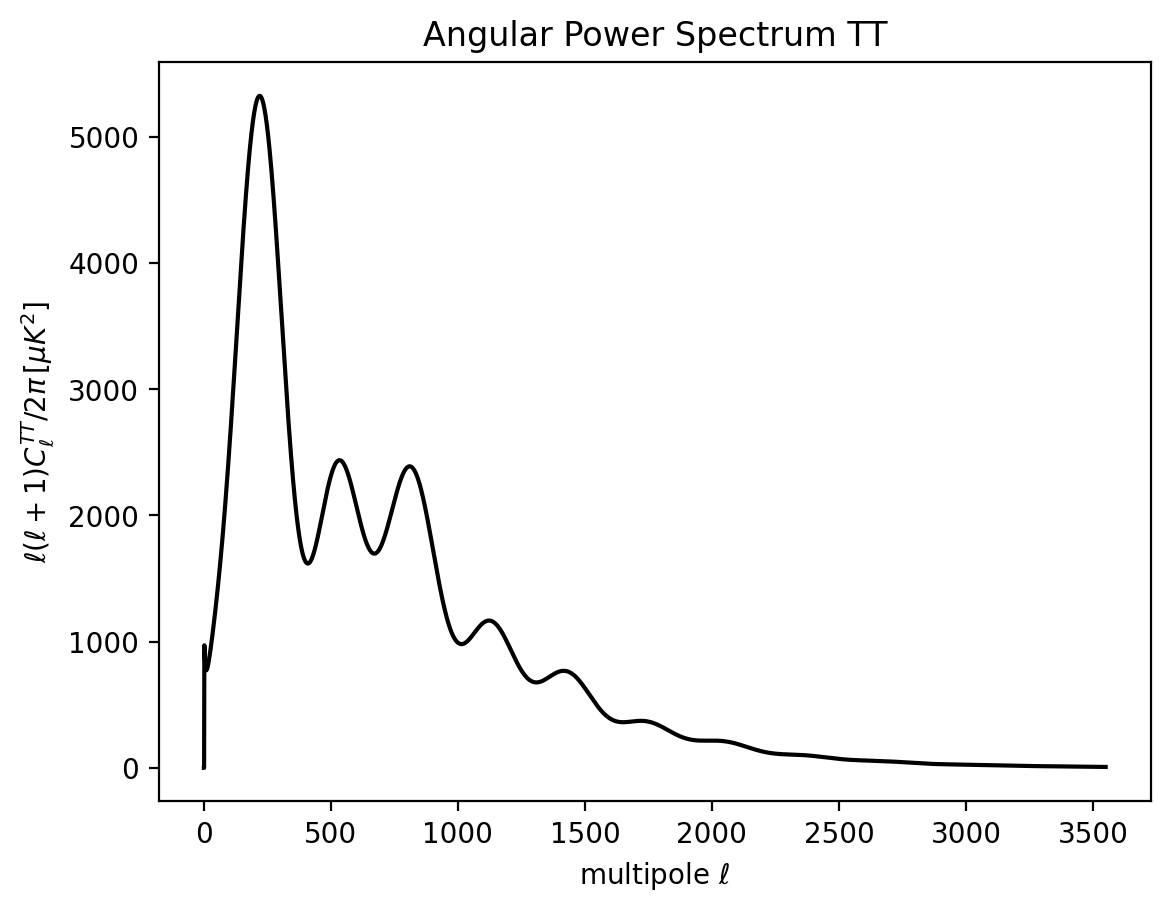

In [7]:
#plot the CMB TT power spectra
plt.plot(ls,totCL[:,0], color='k')
#plt.ylabel('$C_\ell ,[\mu { K}^2] $')
plt.ylabel('$\ell(\ell+1)C_\ell^{TT}/2\pi \,[\mu { K}^2]$')
plt.xlabel('multipole $\ell$')
plt.title('Angular Power Spectrum TT')
plt.show()

## 2. Compute with Alternate Cosmology

In [8]:
# compute alternate cosmology
#Set up a new set of parameters for CAMB
pars2 = camb.CAMBparams()
pars2.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.24, mnu=0.06, omk=0, tau=0.06)
pars2.InitPower.set_params(As=2e-9, ns=0.965, r=0)
pars2.set_for_lmax(3500, lens_potential_accuracy=0);

In [9]:
#calculate results for these parameters
results2 = camb.get_results(pars2)

In [10]:
#get dictionary of CAMB power spectra
powers2 =results2.get_cmb_power_spectra(pars2, CMB_unit='muK')

In [11]:
#get the total lensed CMB power spectra
totCL2=powers2['total']

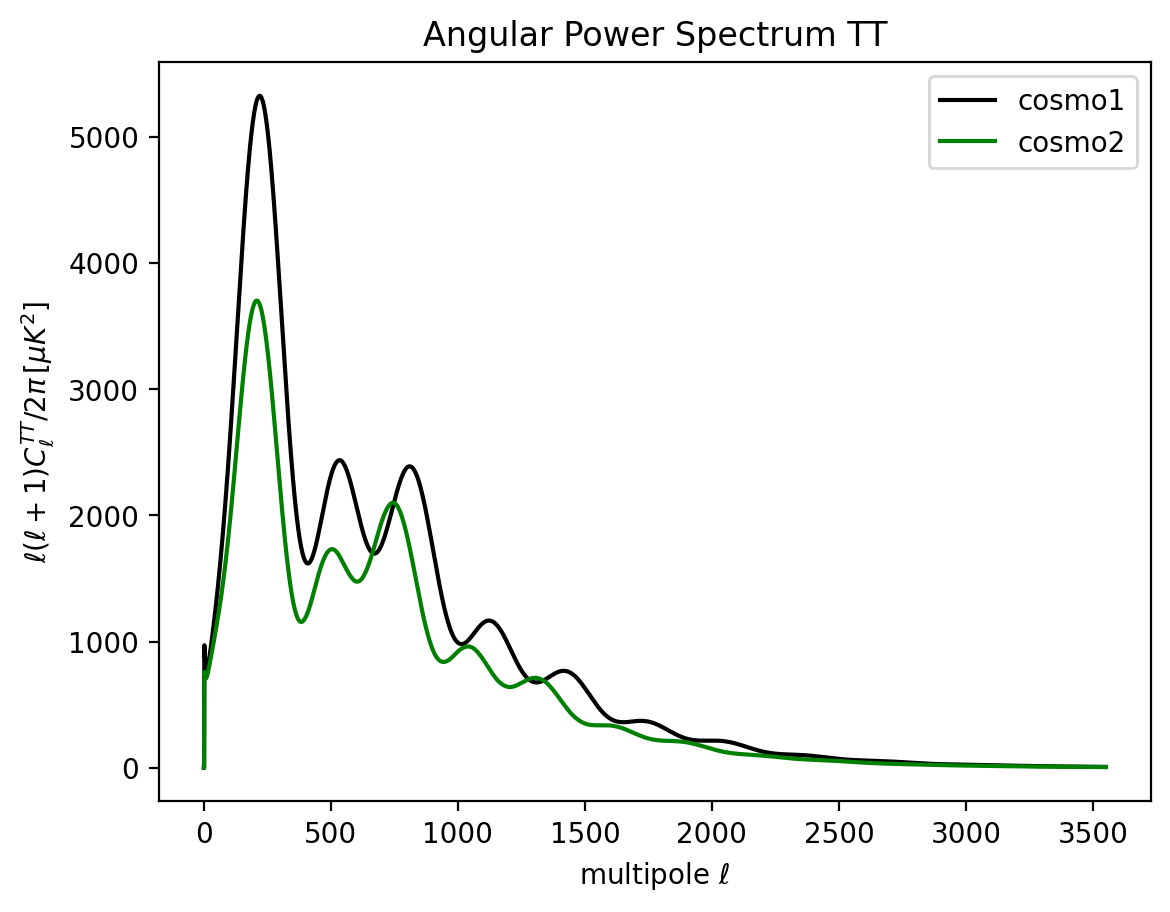

In [12]:
#plot the CMB TT power spectra
plt.plot(ls,totCL[:,0], color='k')
plt.plot(ls,totCL2[:,0], color='g')
plt.ylabel('$\ell(\ell+1)C_\ell^{TT}/2\pi \,[\mu { K}^2]$')
plt.xlabel('multipole $\ell$')
plt.title('Angular Power Spectrum TT')
plt.legend(('cosmo1', 'cosmo2'))
plt.show()

## 3. Read and overplot real Planck Data 

Download on the [Planck Legacy Archive (PLA)](https://www.cosmos.esa.int/web/planck/pla)

In [13]:
path_planck = './'
planck_power_spectra_file = 'COM_PowerSpect_CMB-base-plikHM-TTTEEE-lowl-lowE-lensing-minimum-theory_R3.01.txt'

In [14]:
planck_powspec = ascii.read(path_planck+planck_power_spectra_file)

In [15]:
planck_powspec
#planck_powspec['L']
#planck_powspec['TT']
planck_l = (planck_powspec['L']).astype(float)
planck_tt = (planck_powspec['TT']).astype(float)

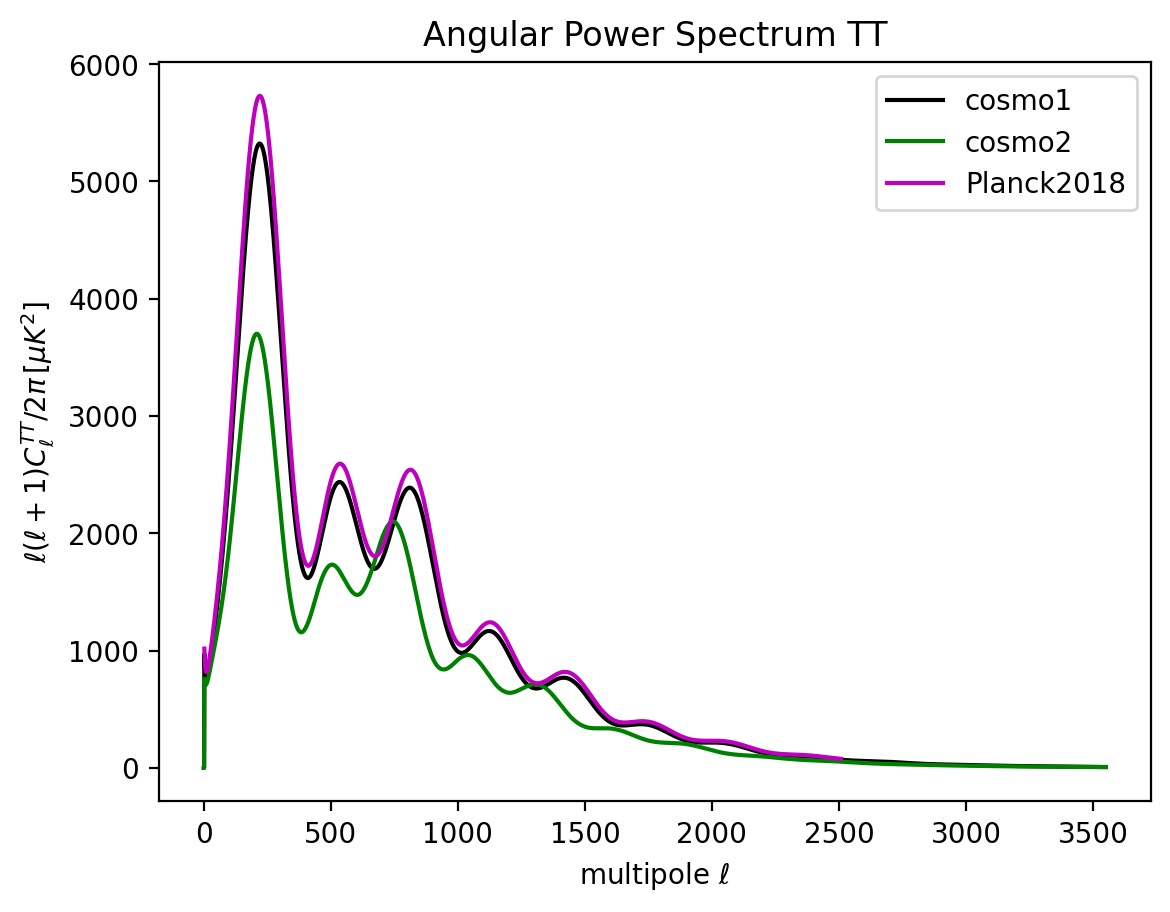

In [16]:
plt.plot(ls,totCL[:,0], color='k')
plt.plot(ls,totCL2[:,0], color='g')
plt.plot(planck_l, planck_tt, color='m')
plt.ylabel('$\ell(\ell+1)C_\ell^{TT}/2\pi \,[\mu { K}^2]$')
plt.xlabel('multipole $\ell$')
plt.title('Angular Power Spectrum TT')
plt.legend(('cosmo1', 'cosmo2', 'Planck2018'))
plt.show()

# Original CAMB examples

In [ ]:
#plot the total lensed CMB power spectra versus unlensed, and fractional difference
totCL=powers['total']
unlensedCL=powers['unlensed_scalar']
print(totCL.shape)
#Python CL arrays are all zero based (starting at L=0), Note L=0,1 entries will be zero by default.
#The different CL are always in the order TT, EE, BB, TE (with BB=0 for unlensed scalar results).
ls = np.arange(totCL.shape[0])
fig, ax = plt.subplots(2,2, figsize = (12,12))
ax[0,0].plot(ls,totCL[:,0], color='k')
ax[0,0].plot(ls,unlensedCL[:,0], color='r')
ax[0,0].set_title('TT')
ax[0,1].plot(ls[2:], 1-unlensedCL[2:,0]/totCL[2:,0]);
ax[0,1].set_title(r'$\Delta TT$')
ax[1,0].plot(ls,totCL[:,1], color='k')
ax[1,0].plot(ls,unlensedCL[:,1], color='r')
ax[1,0].set_title(r'$EE$')
ax[1,1].plot(ls,totCL[:,3], color='k')
ax[1,1].plot(ls,unlensedCL[:,3], color='r')
ax[1,1].set_title(r'$TE$');
for ax in ax.reshape(-1): ax.set_xlim([2,3500]);


In [ ]:
# The lensing B modes are non-linear, so need to be calculated carefully if you want them accurate (even at low ell)
# Need both high lmax, non-linear lensing and high k 
# lens_potential_accuracy=1 turns on the latter, and can be increased to check precision

pars.set_for_lmax(3500, lens_potential_accuracy=1)
results = camb.get_results(pars)
lmax2500CL = results.get_lensed_scalar_cls(CMB_unit='muK')
                  
pars.set_for_lmax(4000, lens_potential_accuracy=1)
results = camb.get_results(pars)
lmax4000CL = results.get_lensed_scalar_cls(CMB_unit='muK')

pars.set_for_lmax(4000, lens_potential_accuracy=2)
results = camb.get_results(pars)
accCL = results.get_lensed_scalar_cls(CMB_unit='muK')

pars.set_for_lmax(6000, lens_potential_accuracy=4)
results = camb.get_results(pars)
refCL = results.get_lensed_scalar_cls(CMB_unit='muK')

fig, ax = plt.subplots(1,2, figsize = (12,4))
ax[0].plot(ls,totCL[:len(ls),2], color='C0')
ax[0].plot(ls,lmax2500CL[:len(ls),2], color='C1')
ax[0].plot(ls,lmax4000CL[:len(ls),2], color='C2')
ax[0].plot(ls,accCL[:len(ls),2], color='C3')
ax[0].plot(ls,refCL[:len(ls),2], color='k')

ax[0].set_xlim([2,2500])
ax[0].set_xlabel(r'$\ell$',fontsize=13)
ax[0].set_ylabel(r'$\ell(\ell+1)C_\ell^{BB}/2\pi\,[\mu {\rm K}^2]$', fontsize=13)

ax[1].plot(ls[2:],totCL[2:len(ls),2]/refCL[2:len(ls),2]-1, color='C0')
ax[1].plot(ls[2:],lmax2500CL[2:len(ls),2]/refCL[2:len(ls),2]-1, color='C1')
ax[1].plot(ls[2:],lmax4000CL[2:len(ls),2]/refCL[2:len(ls),2]-1, color='C2')
ax[1].plot(ls[2:],accCL[2:len(ls),2]/refCL[2:len(ls),2]-1, color='C3')

ax[1].axhline(0,color='k')
ax[1].set_xlim([2,2500])
ax[1].set_xlabel(r'$\ell$',fontsize=13)
ax[1].set_ylabel('fractional error', fontsize=13);
ax[1].legend(['Default accuracy','lmax=2500, lens_potential_accuracy=1',
           'lmax=4000, lens_potential_accuracy=1','lmax=4000, lens_potential_accuracy=2']);


In [ ]:
#Now get matter power spectra and sigma8 at redshift 0 and 0.8
pars = camb.CAMBparams()
pars.set_cosmology(H0=67.5, ombh2=0.022, omch2=0.122)
pars.InitPower.set_params(ns=0.965)
#Note non-linear corrections couples to smaller scales than you want
pars.set_matter_power(redshifts=[0., 0.8], kmax=2.0)

#Linear spectra
pars.NonLinear = model.NonLinear_none
results = camb.get_results(pars)
kh, z, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)
s8 = np.array(results.get_sigma8())

#Non-Linear spectra (Halofit)
pars.NonLinear = model.NonLinear_both
results.calc_power_spectra(pars)
kh_nonlin, z_nonlin, pk_nonlin = results.get_matter_power_spectrum(minkh=1e-4, maxkh=1, npoints = 200)


In [ ]:
print(results.get_sigma8())

In [ ]:
for i, (redshift, line) in enumerate(zip(z,['-','--'])):
    plt.loglog(kh, pk[i,:], color='k', ls = line)
    plt.loglog(kh_nonlin, pk_nonlin[i,:], color='r', ls = line)
plt.xlabel('k/h Mpc');
plt.legend(['linear','non-linear'], loc='lower left');
plt.title('Matter power at z=%s and z= %s'%tuple(z));

In [ ]:
# parameters can also be read from text .ini files, for example this sets up a best-fit 
# Planck 2018 LCDM cosmology (base_plikHM_TTTEEE_lowl_lowE_lensing). 
# [Use planck_2018_acc.ini if you need high-ell and/or accurate BB and CMB lensng spectra at beyond-Planck accuracy]
pars = camb.read_ini('https://raw.githubusercontent.com/cmbant/CAMB/master/inifiles/planck_2018.ini')
# for a local github installation you can just do 
# pars=camb.read_ini(os.path.join(camb_path,'inifiles','planck_2018.ini'))
print(pars)